In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

img = cv2.imread("/home/duc-pc/BKIT/2024-10-01 15-14-00/0095.png")
img = img[-85:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

ModuleNotFoundError: No module named 'skimage'

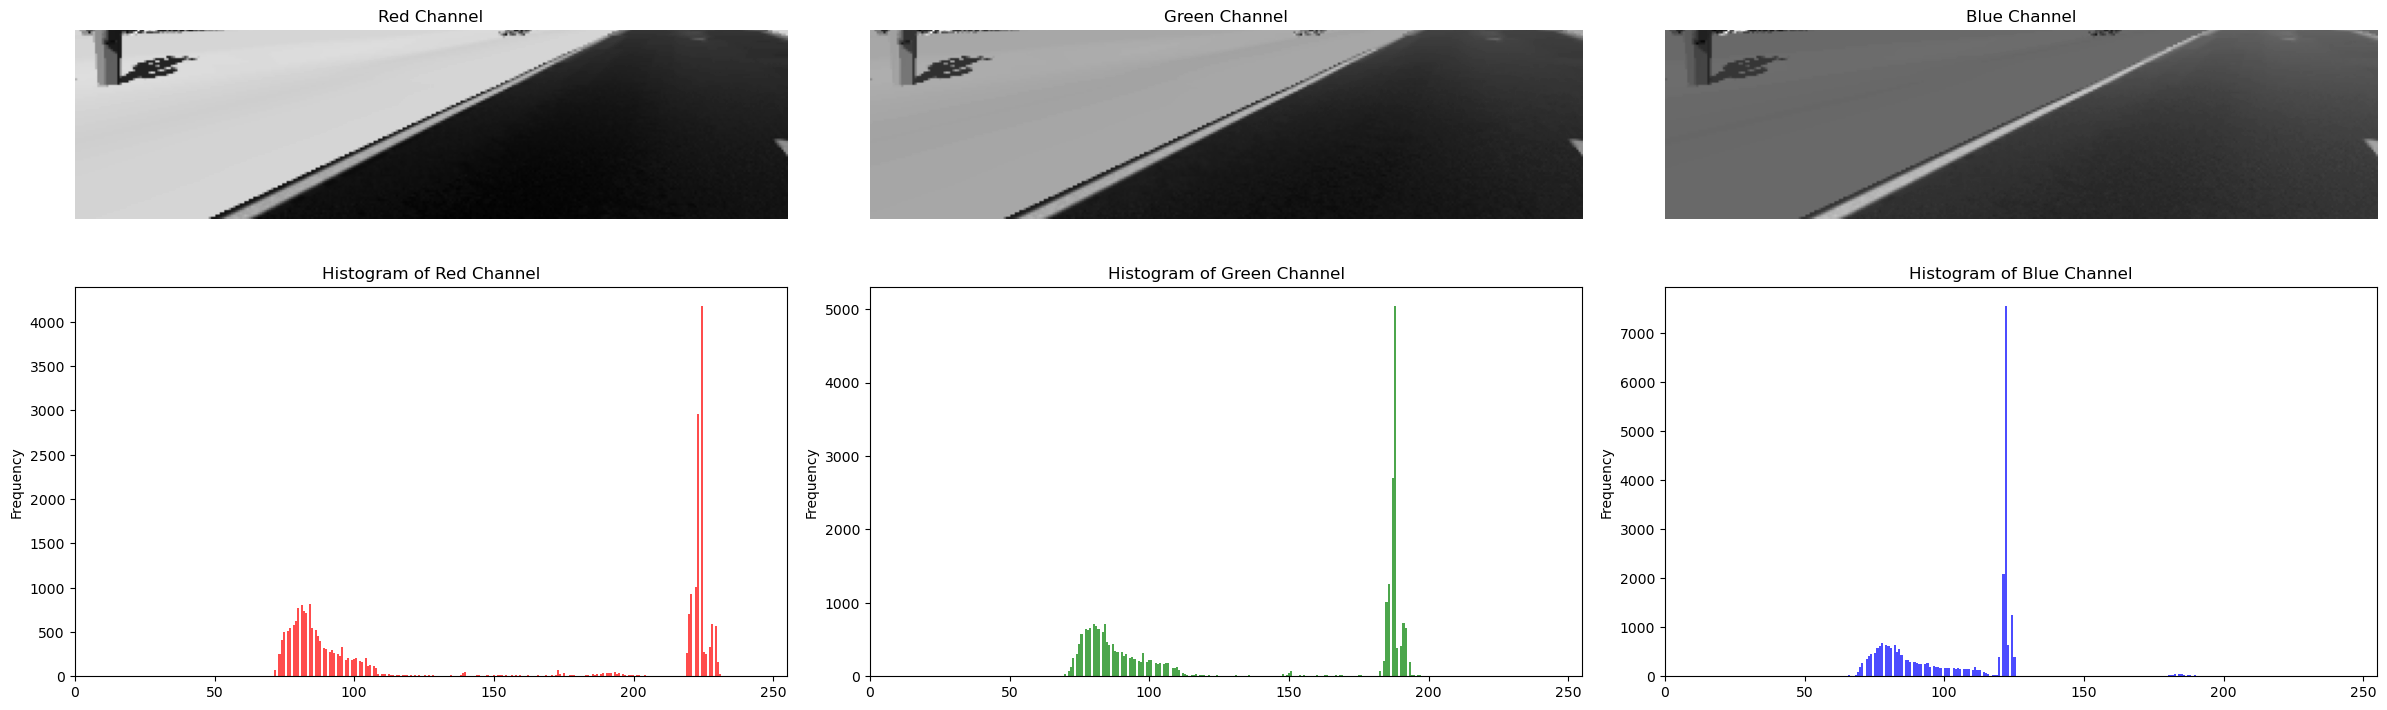

In [26]:
# Create a figure with 3 subplots for images and 3 for histograms
fig, axes = plt.subplots(2, 3, figsize=(24, 8))

# Channel names for labeling
channels = ['Red Channel', 'Green Channel', 'Blue Channel']

# Loop through the channels to display images and histograms
for i in range(3):
    # Display the channel image
    axes[0, i].imshow(img[:, :, i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(channels[i])
    
    # Display the histogram for the channel
    axes[1, i].hist(img[:, :, i].ravel(), bins=256, color=channels[i].lower().split()[0], alpha=0.7)
    axes[1, i].set_xlim([0, 255])  # Adjusted for typical 8-bit image range
    axes[1, i].set_title(f'Histogram of {channels[i]}')
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout
plt.show()

blue = img[:, :, 2]


The value corresponding to 95% cumulative distribution is: 125


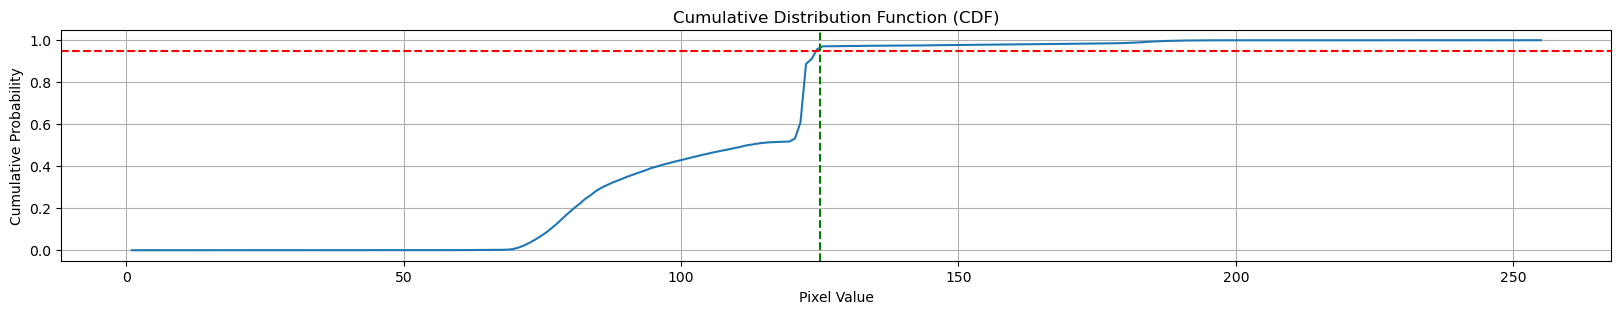

In [27]:
# Flatten the image and compute the histogram
hist, bin_edges = np.histogram(blue.flatten(), bins=256, range=(0, 255))

# Compute the cumulative distribution function (CDF)
cdf = np.cumsum(hist)
cdf_normalized = cdf / cdf[-1]  # Normalize to [0, 1]

# Find the value corresponding to the 90% threshold
threshold_value = np.searchsorted(cdf_normalized, 0.96)

# Print the results
print(f'The value corresponding to 95% cumulative distribution is: {threshold_value}')

# Plotting the CDF
plt.figure(figsize=(20, 3))
plt.plot(bin_edges[1:], cdf_normalized)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=threshold_value, color='g', linestyle='--')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.show()

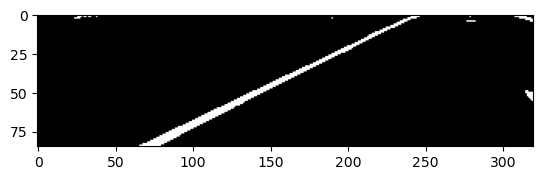

In [28]:
# Set threshold value
threshold = threshold_value  # Adjust as needed

# Create a binary image based on the threshold
binary_blue = np.where(blue > threshold, 255, 0).astype(np.uint8)
plt.imshow(binary_blue, cmap='gray')

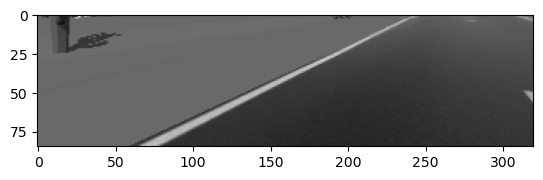

In [29]:
plt.imshow(blue, cmap='gray')

In [30]:
# Tìm các thành phần liên thông
_, binary = cv2.threshold(binary_blue, 127, 255, cv2.THRESH_BINARY)  # Nhị phân hóa ảnh
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary, connectivity=8)

# Tìm nhãn có diện tích lớn nhất (ngoại trừ nền, thường là nhãn 0)
largest_component = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])  # Bỏ qua nền (label 0)

# Tạo một mặt nạ chỉ giữ lại thành phần lớn nhất
mask = np.zeros_like(binary_blue)
mask[labels == largest_component] = 255

# Tìm các tọa độ (x, y) của các điểm trắng
white_points = np.column_stack(np.where(mask == 255))

# Chuyển đổi tọa độ (y, x) thành (x, y) cho hồi quy tuyến tính
X = white_points[:, 1].reshape(-1, 1)  # Cột X (tọa độ x)
y = white_points[:, 0]                 # Cột y (tọa độ y)

# Thực hiện hồi quy tuyến tính
model = LinearRegression().fit(X, y)

# Lấy các giá trị dự đoán từ mô hình hồi quy
y_pred = model.predict(X)

# Vẽ kết quả hồi quy tuyến tính lên ảnh gốc
plt.imshow(mask, cmap='gray')
plt.plot(X, y_pred, color='red', linewidth=2)  # Vẽ đường hồi quy
plt.show()

# In ra hệ số hồi quy và giao điểm
print(f"Hệ số góc (slope): {model.coef_[0]}")
print(f"Giao điểm (intercept): {model.intercept_}")

NameError: name 'LinearRegression' is not defined